In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from time import time
import gc
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

gc.enable()

In [3]:
%matplotlib inline

In [4]:
import dask
import dask.dataframe as dd

# Load the data

In [5]:
train_data=pd.read_csv('../dataset/PUBG/train_V2.csv')
train_data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [6]:
train_data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


# How many features the data set have

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [8]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
assists,4446966.0,0.233815,0.588573,0.0,0.0,0.0000,0.000000,22.0
boosts,4446966.0,1.106908,1.715794,0.0,0.0,0.0000,2.000000,33.0
damageDealt,4446966.0,130.717138,170.780621,0.0,0.0,84.2400,186.000000,6616.0
DBNOs,4446966.0,0.657876,1.145743,0.0,0.0,0.0000,1.000000,53.0
headshotKills,4446966.0,0.226820,0.602155,0.0,0.0,0.0000,0.000000,64.0
heals,4446966.0,1.370147,2.679982,0.0,0.0,0.0000,2.000000,80.0
killPlace,4446966.0,47.599350,27.462937,1.0,24.0,47.0000,71.000000,101.0
killPoints,4446966.0,505.006042,627.504896,0.0,0.0,0.0000,1172.000000,2170.0
kills,4446966.0,0.924783,1.558445,0.0,0.0,0.0000,1.000000,72.0
killStreaks,4446966.0,0.543955,0.710972,0.0,0.0,0.0000,1.000000,20.0


In [9]:
train_data[train_data['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [10]:
train_data.drop(2744604, inplace=True)

In [11]:
train_data[train_data['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


In [12]:
train_data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [13]:
train_data.drop(columns=['Id', 'groupId', 'matchId'], inplace=True)

In [14]:
train_data.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'matchType', 'maxPlace', 'numGroups', 'rankPoints',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

# ClassDistribution and finding useful features

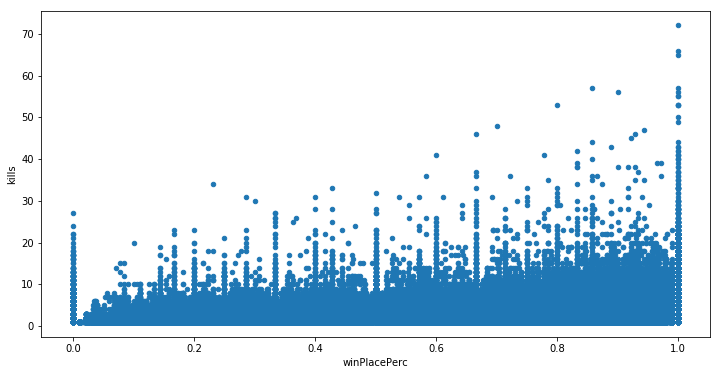

In [15]:
train_data[train_data['kills'] > 0].plot.scatter(x='winPlacePerc', y='kills', figsize=(12, 6))

[Text(0.5, 0, 'winPlacePerc'),
 Text(1.5, 0, 'boosts'),
 Text(2.5, 0, 'damageDealt'),
 Text(3.5, 0, 'heals'),
 Text(4.5, 0, 'kills'),
 Text(5.5, 0, 'rideDistance'),
 Text(6.5, 0, 'roadKills'),
 Text(7.5, 0, 'walkDistance'),
 Text(8.5, 0, 'weaponsAcquired')]

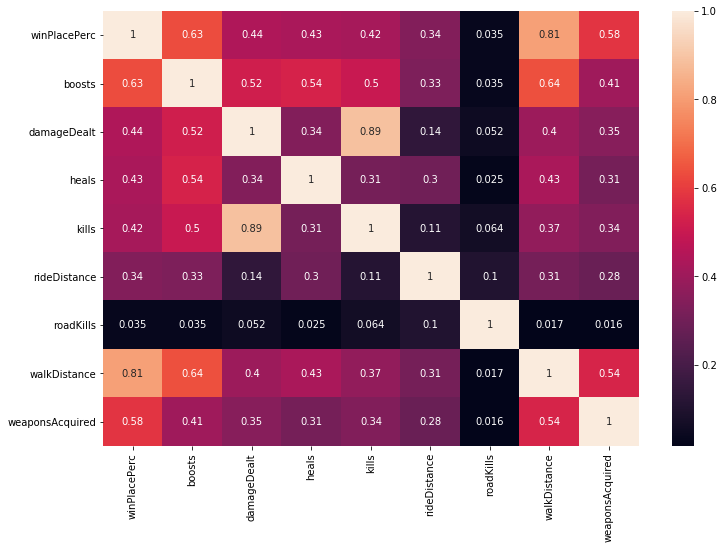

In [16]:
l = ['winPlacePerc', 'boosts', 'damageDealt', 'heals', 'kills', 'rideDistance', 'roadKills', 'walkDistance', 'weaponsAcquired']
figure, ax = plt.subplots(figsize=(12,8))
f = train_data.loc[:, l].corr()
g = sns.heatmap(f, annot=True, ax=ax)
g.set_yticklabels(labels=l[:], rotation=0)
g.set_xticklabels(labels=l[:], rotation=90)

In [17]:
train_data['distance_covered']=train_data['rideDistance']+train_data['walkDistance']+train_data['swimDistance']

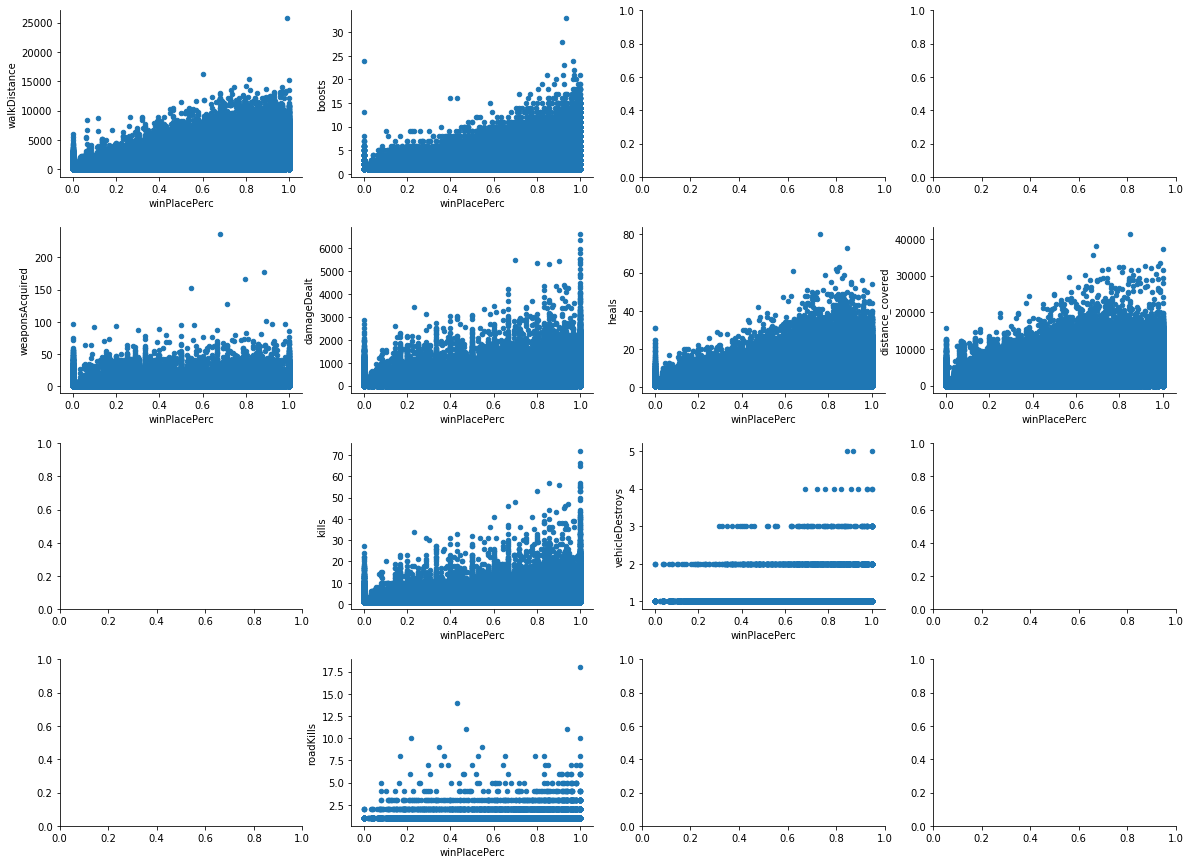

In [18]:
fig, axarr = plt.subplots(4, 4, figsize=(20, 15))
train_data[train_data['walkDistance'] > 0].plot.scatter(x='winPlacePerc', y='walkDistance', ax=axarr[0][0])
train_data[train_data['boosts'] > 0].plot.scatter(x='winPlacePerc', y='boosts', ax=axarr[0][1])
train_data[train_data['weaponsAcquired'] > 0].plot.scatter(x='winPlacePerc', y='weaponsAcquired', ax=axarr[1][0])
train_data[train_data['damageDealt'] > 0].plot.scatter(x='winPlacePerc', y='damageDealt', ax=axarr[1][1])
train_data[train_data['heals'] > 0].plot.scatter(x='winPlacePerc', y='heals', ax=axarr[1][2])
train_data[train_data['kills'] > 0].plot.scatter(x='winPlacePerc', y='kills', ax=axarr[2][1])
train_data[train_data['vehicleDestroys'] > 0].plot.scatter(x='winPlacePerc', y='vehicleDestroys', ax=axarr[2][2])
train_data[train_data['distance_covered'] > 0].plot.scatter(x='winPlacePerc', y='distance_covered', ax=axarr[1][3])
train_data[train_data['roadKills'] > 0].plot.scatter(x='winPlacePerc', y='roadKills', ax=axarr[3][1])

plt.subplots_adjust(hspace=.3)
sns.despine()

In [19]:
train_data.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'matchType', 'maxPlace', 'numGroups', 'rankPoints',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc', 'distance_covered'],
      dtype='object')

In [20]:
train_data.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,distance_covered
0,0,0,0.00,0,0,0,60,1241,0,0,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,244.8000
1,0,0,91.47,0,0,0,57,0,0,0,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,1445.0445
2,1,0,68.00,0,0,0,47,0,0,0,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,161.8000
3,0,0,32.90,0,0,0,75,0,0,0,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,202.7000
4,0,0,100.00,0,0,0,45,0,1,1,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,49.7500


[Text(0.5, 0, 'winPlacePerc'),
 Text(1.5, 0, 'boosts'),
 Text(2.5, 0, 'damageDealt'),
 Text(3.5, 0, 'heals'),
 Text(4.5, 0, 'kills'),
 Text(5.5, 0, 'rideDistance'),
 Text(6.5, 0, 'roadKills'),
 Text(7.5, 0, 'distance_covered'),
 Text(8.5, 0, 'weaponsAcquired')]

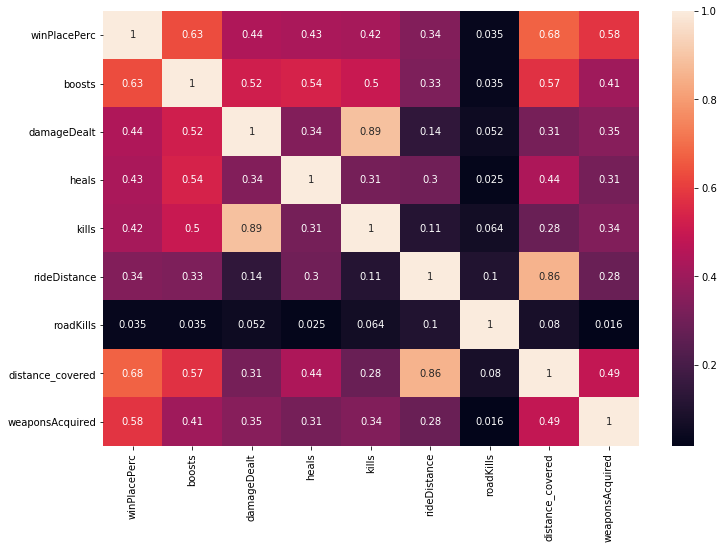

In [21]:
l = ['winPlacePerc', 'boosts', 'damageDealt', 'heals', 'kills', 'rideDistance', 'roadKills', 'distance_covered', 'weaponsAcquired']
figure, ax = plt.subplots(figsize=(12,8))
f = train_data.loc[:, l].corr()
g = sns.heatmap(f, annot=True, ax=ax)
g.set_yticklabels(labels=l[:], rotation=0)
g.set_xticklabels(labels=l[:], rotation=90)

[Text(0.5, 0, 'assists'),
 Text(1.5, 0, 'boosts'),
 Text(2.5, 0, 'damageDealt'),
 Text(3.5, 0, 'DBNOs'),
 Text(4.5, 0, 'headshotKills'),
 Text(5.5, 0, 'heals'),
 Text(6.5, 0, 'killPlace'),
 Text(7.5, 0, 'killPoints'),
 Text(8.5, 0, 'kills'),
 Text(9.5, 0, 'killStreaks'),
 Text(10.5, 0, 'longestKill'),
 Text(11.5, 0, 'matchDuration'),
 Text(12.5, 0, 'matchType'),
 Text(13.5, 0, 'maxPlace'),
 Text(14.5, 0, 'numGroups'),
 Text(15.5, 0, 'rankPoints'),
 Text(16.5, 0, 'revives'),
 Text(17.5, 0, 'rideDistance'),
 Text(18.5, 0, 'roadKills'),
 Text(19.5, 0, 'swimDistance'),
 Text(20.5, 0, 'teamKills'),
 Text(21.5, 0, 'vehicleDestroys'),
 Text(22.5, 0, 'walkDistance'),
 Text(23.5, 0, 'weaponsAcquired'),
 Text(24.5, 0, 'winPoints'),
 Text(25.5, 0, 'winPlacePerc')]

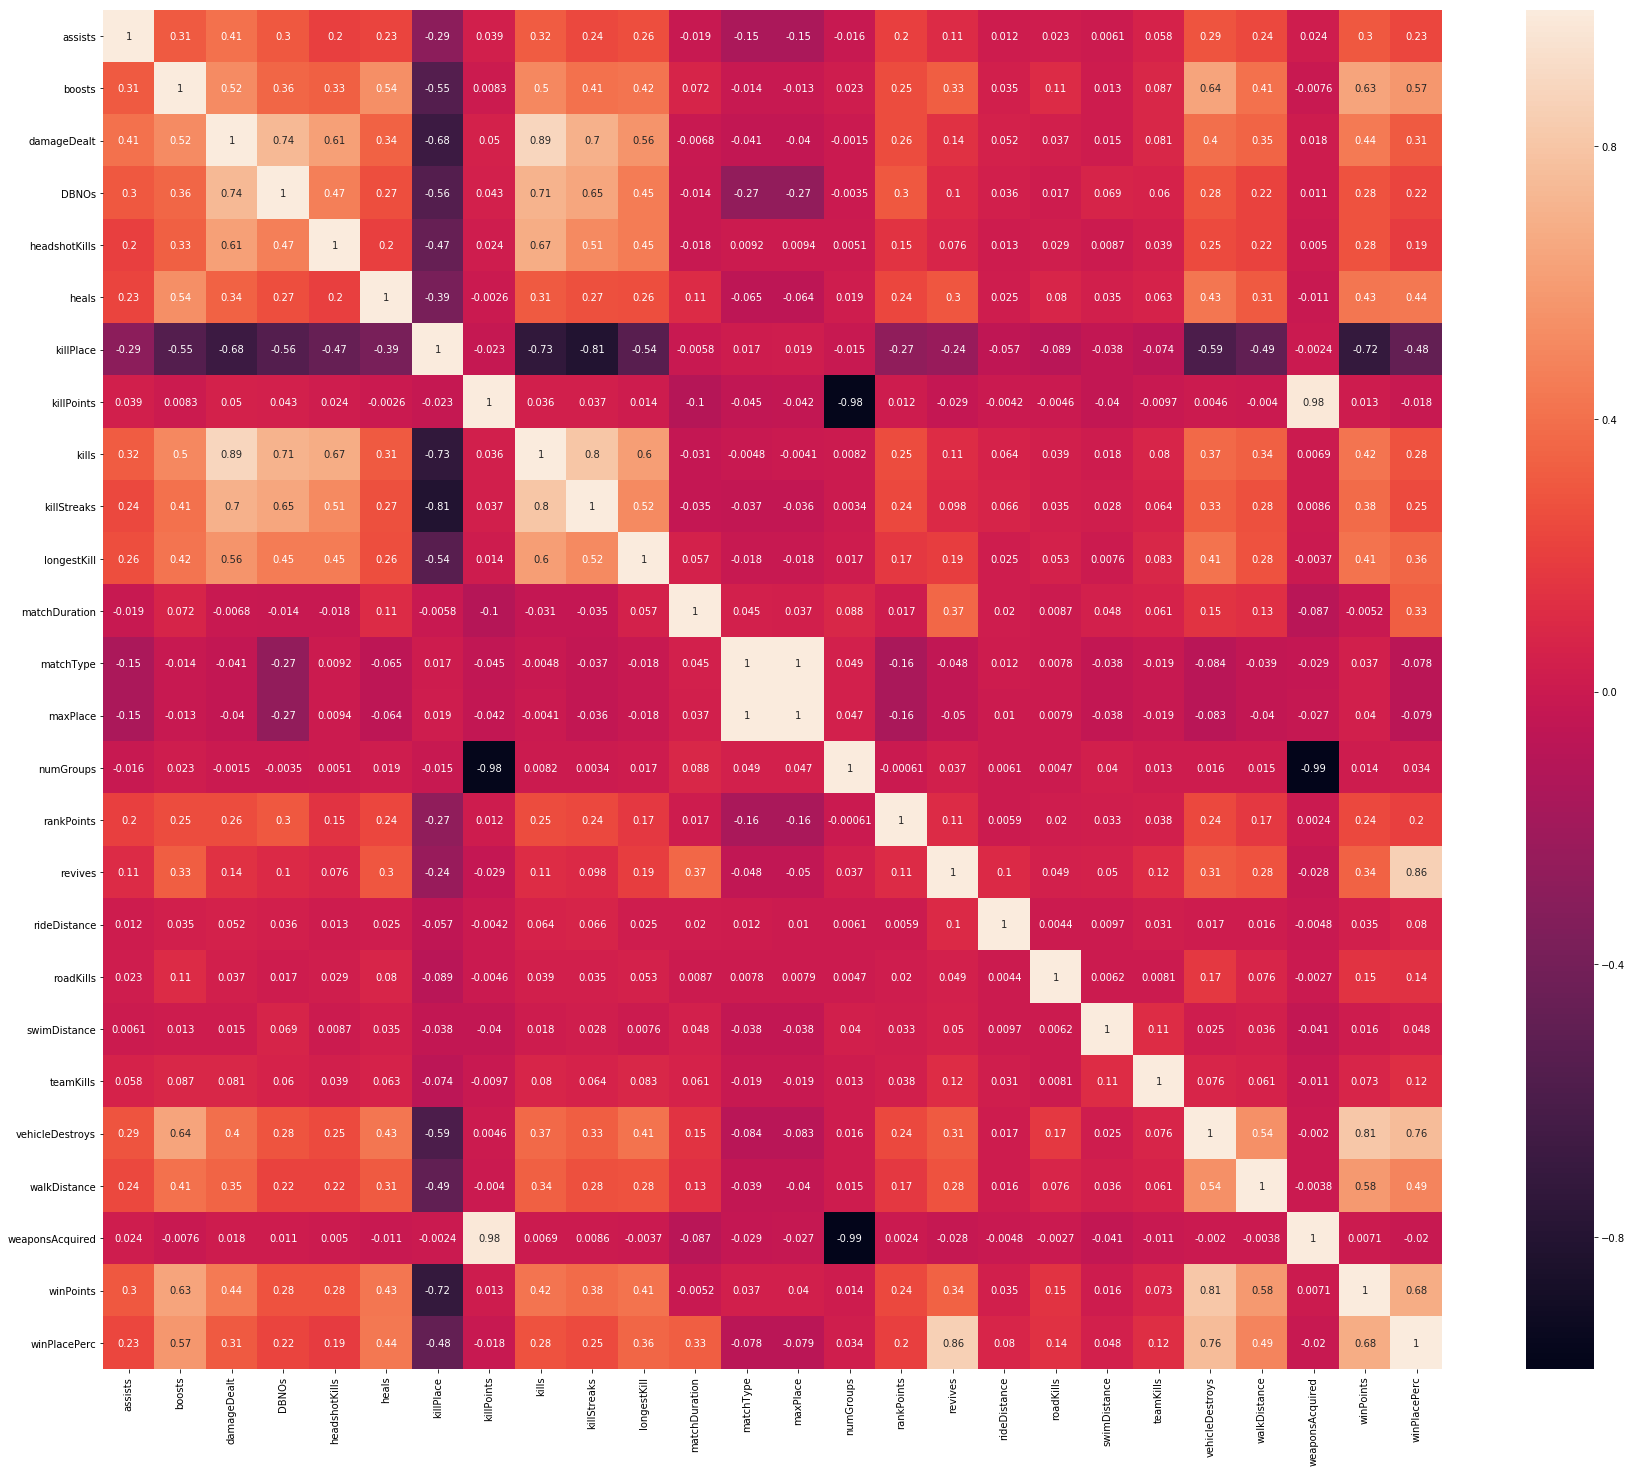

In [22]:
#l = ['winPlacePerc', 'boosts', 'damageDealt', 'heals', 'kills', 'rideDistance', 'roadKills', 'distance_covered', 'weaponsAcquired']
l=train_data.columns
figure, ax = plt.subplots(figsize=(30,25))
f = train_data.loc[:, l].corr()
g = sns.heatmap(f, annot=True, ax=ax)
g.set_yticklabels(labels=l[:], rotation=0)
g.set_xticklabels(labels=l[:], rotation=90)

In [22]:
labels= ['boosts','revives', 'damageDealt', 'heals', 'kills', 'vehicleDestroys', 'roadKills', 'distance_covered', 'weaponsAcquired',]

X=train_data[labels]
y=train_data['winPlacePerc']

In [23]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=123)

In [24]:
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(max_iter=1000, tol=1e-3)

In [54]:
clf.fit(train_X,train_y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=1000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [55]:
pred = clf.predict(val_X)

In [58]:
print('MAE validation', mean_absolute_error(val_y, pred))

MAE validation 6998001173499.195


In [25]:
from sklearn.ensemble import RandomForestRegressor
clf_RF = RandomForestRegressor(n_estimators=50, min_samples_leaf=2, min_samples_split=3, max_features=0.5 ,n_jobs=-1)

In [60]:
clf_RF.fit(train_X,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [61]:
pred = clf_RF.predict(val_X)
print('MAE validation', mean_absolute_error(val_y, pred))

MAE validation 0.11684697631786356


In [62]:
gc.collect()

6

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [29]:
scaled_trainX=scaler.fit_transform(train_X)

c:\users\saptarshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\saptarshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [28]:
scaled_valX=scaler.fit_transform(val_X)

c:\users\saptarshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\saptarshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [30]:
clf.fit(scaled_trainX,train_y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=1000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [31]:
scaled_pred=clf.predict(scaled_valX)
print('MAE validation', mean_absolute_error(val_y, scaled_pred))

MAE validation 0.15291464511397604


In [32]:
clf_RF.fit(scaled_trainX,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [34]:
scaled_pred_RF=clf_RF.predict(scaled_valX)
print('MAE validation', mean_absolute_error(val_y, scaled_pred_RF))

MAE validation 0.11664457854804025
